<h2>Exercise 1 </h2>
<h3>Question 1: Pandas and Numpy</h3>
<h4>Task a:</h4>
Write a program that reads the provided text file and counts the occurrences of unique words. The program should include all words in the count.

In [1]:
import requests
import os
import pandas as pd
from collections import Counter

url = "https://raw.githubusercontent.com/aalanwar/Logical-Zonotope/refs/heads/main/README.md"
response = requests.get(url)
folder = os.path.expanduser("~/Documents/AML/AML_Assignment_1")

global path
path = os.path.join(folder, "README.txt")
file = open(path, "w")
file.write(response.text)
file.close()

def count_uniq_words(file_path):
    file = open(file_path, 'r')
    words = file.read().lower().split() 
    amount_words = Counter(words)
    file.close()
    return amount_words

count_uniq_words(path)

Counter({'logical': 40,
         '/>': 40,
         '<br': 37,
         'the': 22,
         'of': 18,
         'and': 16,
         'a': 15,
         'polynomial': 13,
         'for': 13,
         'to': 12,
         'in': 10,
         'we': 10,
         'z': 10,
         '=': 10,
         'zonotopes': 9,
         'zonotope': 7,
         'two': 7,
         'or': 7,
         '##': 6,
         'set': 6,
         'reachability': 6,
         'analysis': 6,
         'between': 6,
         'representation': 5,
         'on': 5,
         'are': 5,
         'operations': 5,
         'perform': 5,
         'run': 5,
         'zontoopes': 5,
         'zonotopes:': 4,
         'this': 4,
         'amr': 4,
         'frank': 4,
         'jiang,': 4,
         'karl': 4,
         'boolean': 4,
         'able': 4,
         '```': 4,
         '1-': 3,
         'j.': 3,
         'verification': 3,
         'functions': 3,
         'exact': 3,
         'zonotopes,': 3,
         'while': 3,
         'all':

<h4>Task b:</h4>
Modify the program to exclude common words such as ’the’, ’a’, ’an’, and ’be’ from the count. Finally, generate a histogram displaying the top 10 most frequent words.

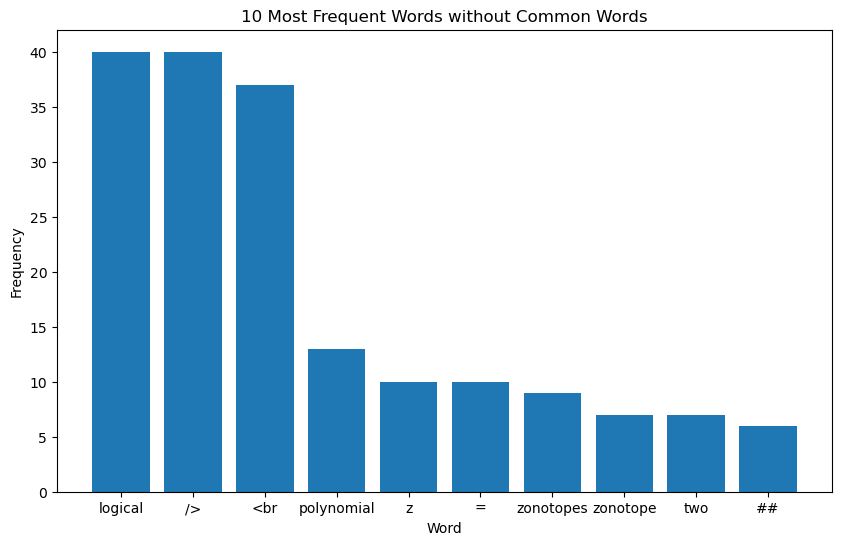

In [ ]:
import matplotlib.pyplot as plt
common_words = ['the', 'a', 'an', 'be', 'of', 'and', 'for', 'to', 'in', 'we', 'or', 'on', 'are', 'it']
filtered_words = []
def count_uniq_words_uncommon(file_path):
    file = open(file_path, 'r')
    words = file.read().lower().split() 
    for word in words: 
        if word not in common_words:
            filtered_words.append(word)
    amount_filtered_words = Counter(filtered_words)
    file.close()
    return amount_filtered_words

most_common_words = count_uniq_words_uncommon(path).most_common(10)

words, amounts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, amounts)
plt.title('10 Most Frequent Words without Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

<h4>Task c:</h4>
Using Numpy for matrix operations: Create a matrix A with dimensions 100 × 20 (n = 100, m = 20).
Initialize matrix A with random values. Then, create a vector v of size 20 × 1 and initialize it with
values from a normal distribution, where the mean µ is 2 and the standard deviation σ is 0.01. Perform
the following operations:

- Iteratively multiply each row of matrix A element-wise by vector v, and accumulate the results into a new vector c.
- Calculate the mean and standard deviation of vector c.
- Plot a histogram of vector c using 5 bins.

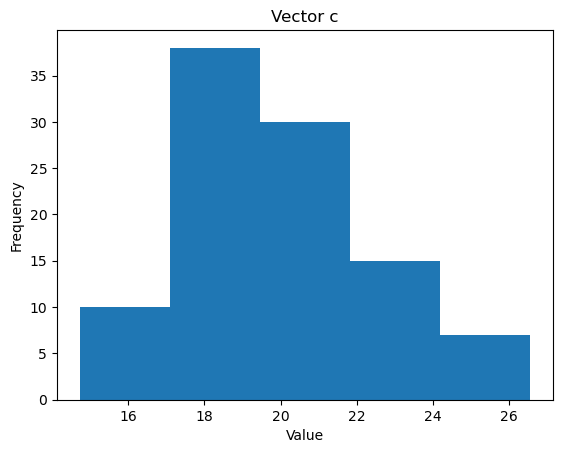

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n, m = 100, 20
mean, sd = 2, 0.01
np.random.seed(42)
A = np.random.rand(n, m)
v = np.random.normal(mean, sd, (m, 1))
c = np.matmul(A, v)

mean_c = np.mean(c)
std_c = np.std(c)

plt.hist(c, bins=5)
plt.title('Vector c')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<h3>Question 2: Linear Regression </h3>

- Generate 3 sets of simple data. i.e. a matrix A with dimensions 100 × 2. Initialize it with normal distribution µ = 2 and σ = [0.01, 0.1, 1].
- Implement the ”Learn Simple Linear Regression” algorithm and train it using matrix A to learn
values of β0 and β1.
- Implement the ”Predict using Simple Linear Regression” algorithm and calculate the points for
each training example in matrix A.
- Plot the training points from matrix A and predicted values in the form of line graph.

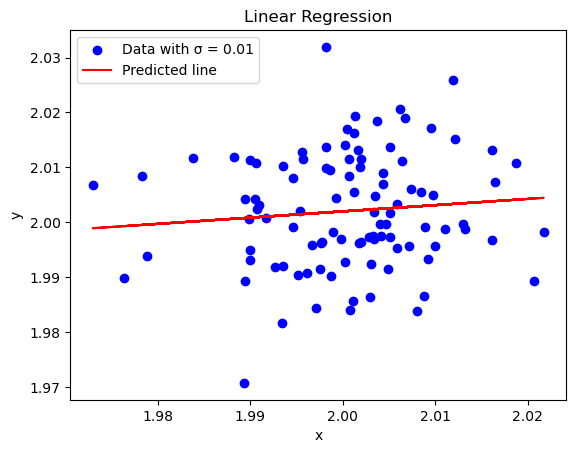

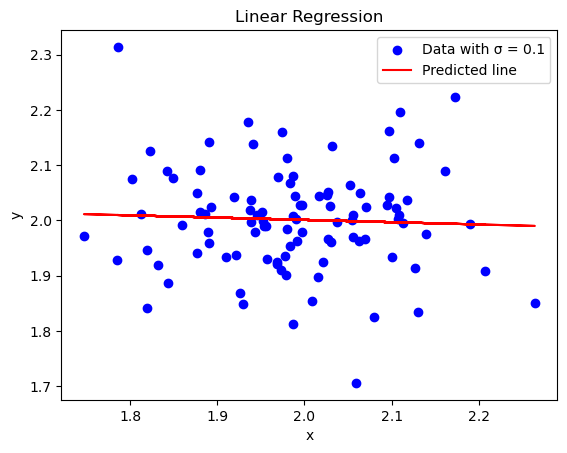

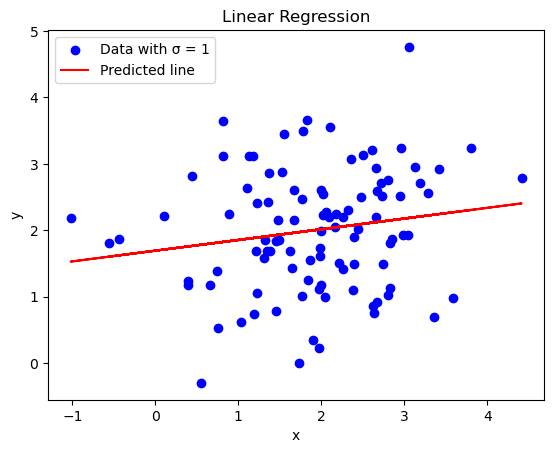

In [4]:
global A_1, A_2, A_3
A_1 = np.random.normal(2, 0.01, (100, 2)) 
A_2 = np.random.normal(2, 0.1, (100, 2))
A_3 = np.random.normal(2, 1, (100, 2))

def learn_simple_linear_regression(A):
    x = A[:, 0]
    y = A[:, 1]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_0, beta_1

def predict_using_simple_linear_regression(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

def plot_regression(A, sd):
    x = A[:, 0]
    y = A[:, 1]
    beta_0, beta_1 = learn_simple_linear_regression(A)
    plt.scatter(x, y, color='blue', label=f'Data with σ = {sd}')
    y_pred = predict_using_simple_linear_regression(x, beta_0, beta_1)
    plt.plot(x, y_pred, color = 'red', label=f'Predicted line')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression')
    plt.legend()
    plt.show()

plot_regression(A_1, 0.01)
plot_regression(A_2, 0.1)
plot_regression(A_3, 1)


- Comment on the effect that σ has on the line that is predicted.
- Put β0 to zero and rerun the program to generate the predicted line. Comment on the change
you see for the varying values of σ

σ describes how spread the data is from the mean. With the smallest σ = 0.01 the datapoints are less spread around the mean and lead to more accurate prediction (line). For the larger σ = 0.1 and σ  = 1, the datapoint are more spread (variance increases), so there is more noise in the data, which leads to less accurate prediction. 

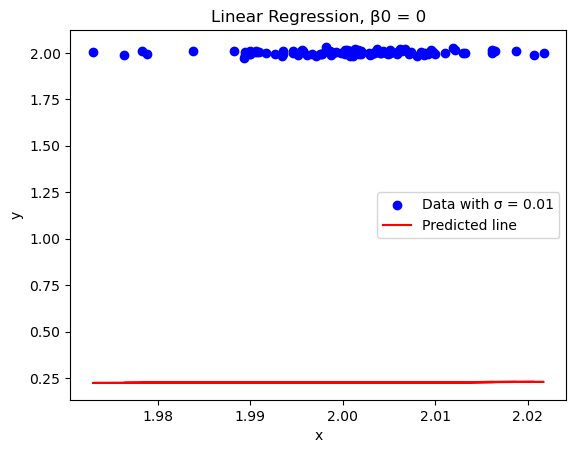

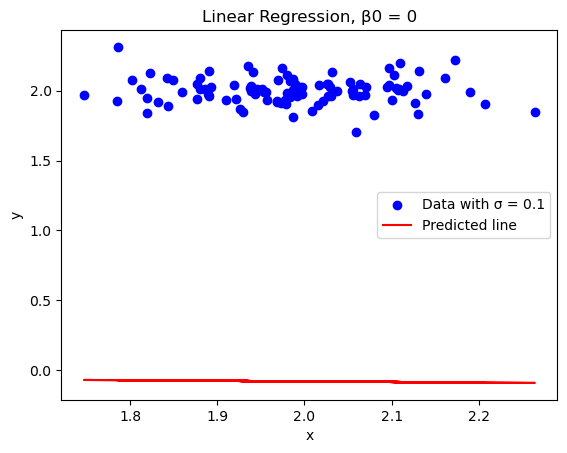

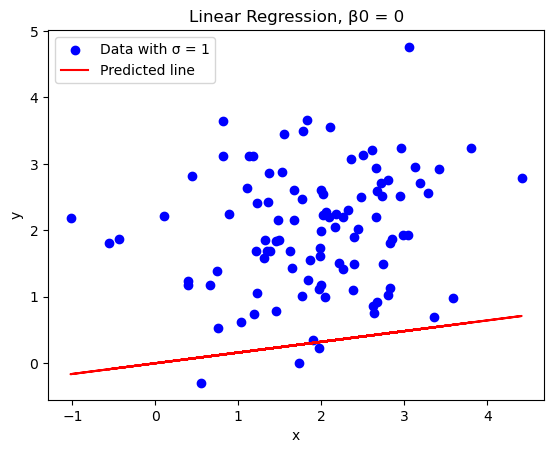

In [5]:
def plot_regression_beta0_zero(A, sd):
    x = A[:, 0]
    y = A[:, 1]
    beta_0, beta_1 = learn_simple_linear_regression(A)
    beta_0 = 0
    plt.scatter(x, y, color='blue', label= f'Data with σ = {sd}')
    y_pred = predict_using_simple_linear_regression(x, beta_0, beta_1)
    plt.plot(x, y_pred, color = 'red', label=f'Predicted line')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression, β0 = 0')
    plt.legend()
    plt.show()

plot_regression_beta0_zero(A_1, 0.01 )
plot_regression_beta0_zero(A_2, 0.1)
plot_regression_beta0_zero(A_3, 1 )

Setting β0 to zero changes the slope for the data with lower variance more strongly than for the once with higher variance. When the data ist little spred it makes it difficult for the Predicion to detect the relationship between input and output. 

- Put β1 to zero and rerun the program to generate the predicted line. Comment on the change
you see for the varying values of σ

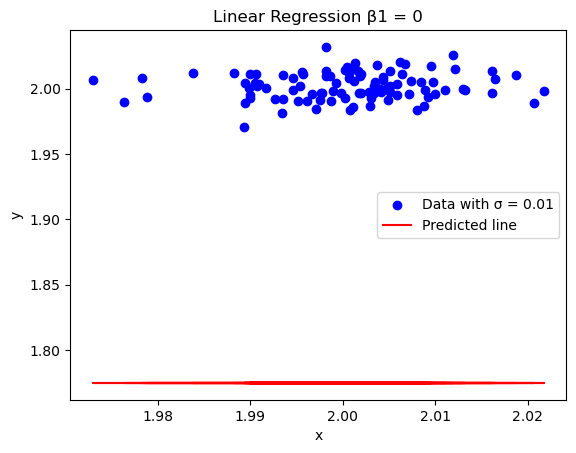

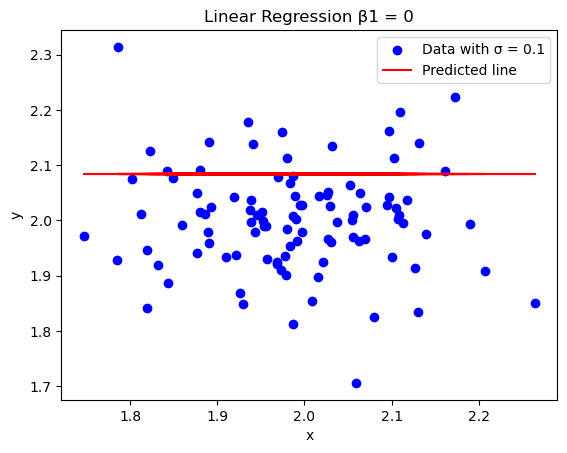

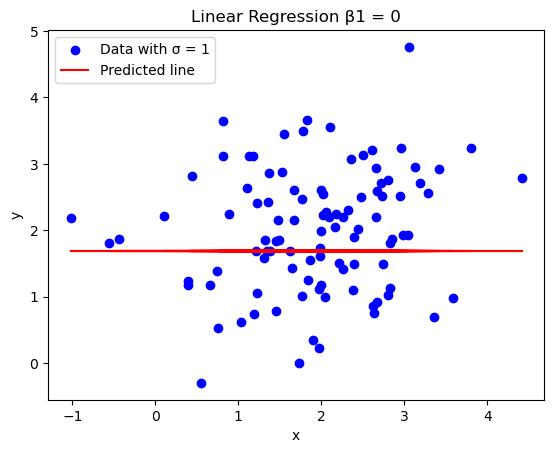

In [6]:
def plot_regression_beta1_zero(A, sd):
    x = A[:, 0]
    y = A[:, 1]
    beta_0, beta_1 = learn_simple_linear_regression(A)
    beta_1 = 0
    plt.scatter(x, y, color='blue', label= f'Data with σ = {sd}')
    y_pred = predict_using_simple_linear_regression(x, beta_0, beta_1)
    plt.plot(x, y_pred, color = 'red', label=f'Predicted line')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression β1 = 0')
    plt.legend()
    plt.show()

plot_regression_beta1_zero(A_1, 0.01)
plot_regression_beta1_zero(A_2, 0.1)
plot_regression_beta1_zero(A_3, 1)

when setting β1 the slope of all the prdection lines becomes horizontal, independently of the variation. When sd is very small, the slope is anyway close to zero, as the data is not very spread around the mean and its hard to detect any correlation between x and y, for very small sd the beta1 and the spediction line more accurate. 

- Use numpy.linalg.lstsq to replace step 2 for learning values of β0 and β1.
- Use sklearn.linear model.LinearRegression to replace step 2 for learning values of β0 and β1.
- Comment and compare between the results, do you see differences? why?

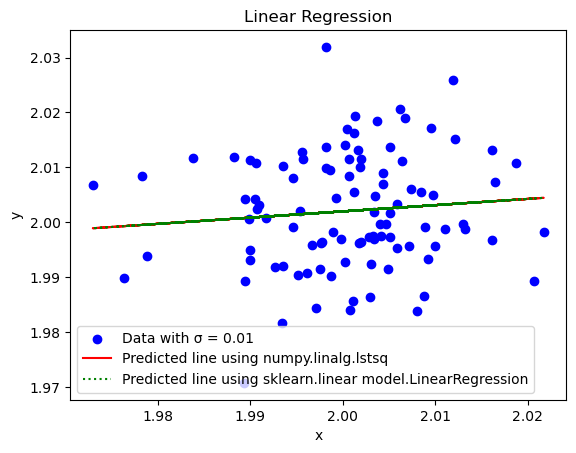

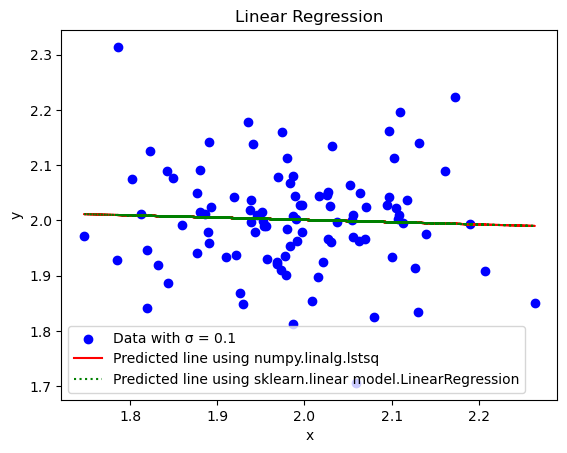

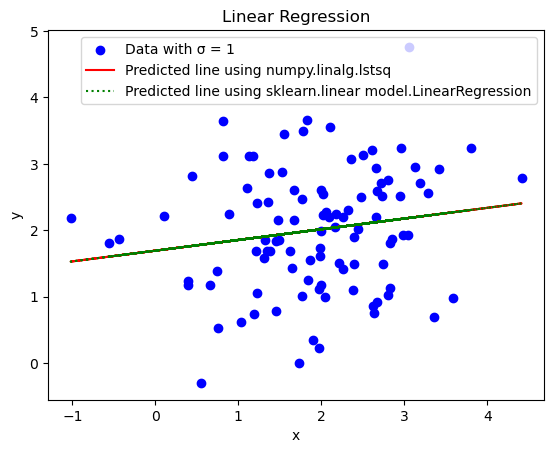

In [7]:
from sklearn.linear_model import LinearRegression

def learn_lstsq_linear_regression(A):
    x = A[:, 0].reshape(-1, 1)
    y = A[:, 1]
    amount_rows_x = x.shape[0]
    ones_for_intercept = np.ones((amount_rows_x, 1))
    X = np.concatenate((ones_for_intercept, x), axis=1)  # axis=1 -> concatenation along columns

    betas, _, _, _ = np.linalg.lstsq(X, y, rcond=None) # rcond -> relative condition number
    beta_0, beta_1 = betas
    return beta_0, beta_1

def learn_sklearn_linear_regression(A):
    x = A[:, 0].reshape(-1, 1)
    y = A[:, 1]

    model = LinearRegression()
    model.fit(x, y)

    beta_0 = model.intercept_
    beta_1 = model.coef_[0]
    return beta_0, beta_1

def plot_regression_using_diff_libraries(A, sd):
    x = A[:, 0]
    y = A[:, 1]
    beta_0_1, beta_1_1 = learn_sklearn_linear_regression(A)
    plt.scatter(x, y, color='blue', label=f'Data with σ = {sd}')
    y_pred = predict_using_simple_linear_regression(x, beta_0_1, beta_1_1)
    plt.plot(x, y_pred, color = 'red', label=f'Predicted line using numpy.linalg.lstsq')
    
    beta_0_2, beta_1_2 = learn_lstsq_linear_regression(A)
    y_pred = predict_using_simple_linear_regression(x, beta_0_2, beta_1_2)
    plt.plot(x, y_pred, color = 'green', linestyle=':', label=f'Predicted line using sklearn.linear model.LinearRegression')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Linear Regression')
    plt.legend()
    plt.show()

plot_regression_using_diff_libraries(A_1, 0.01 )
plot_regression_using_diff_libraries(A_2, 0.1 )
plot_regression_using_diff_libraries(A_3, 1 )


The predicted lines are overlapping as both methods are used to determine beta0 and beta1, but using different approaches.  